# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [3]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

In [4]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [5]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [6]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

Based on the data above, for every year increase, there is a 0.267722 increase in the life expectancy of a nation. The y-intercept however does not really make much sense doing it this way. Visually we can see the effect of year on life expectancy using the predict method:

In [8]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_df['mean_estimate'] = lr_life_expectancy.predict(pred_df)

pred_df.head(2)

,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728


Verify the first estimate:

In [10]:
Year = 1990
estimate = lr_life_expectancy.params['Intercept'] + lr_life_expectancy.params['Year']*Year
estimate

64.62888940412671

Plot estimates with original dataset:

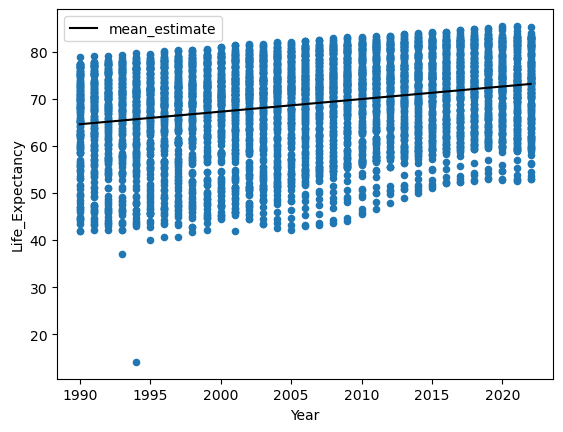

In [12]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);

 b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  


In [14]:
from patsy.builtins import *

In [15]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ I(Year - 1990)", data=gdp_le).fit()

In [16]:
lr_life_expectancy.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

The y-intercept coefficient finally makes sense, year 1990 is at the y-intercept and the average life expectancy when the year is at the y-intercept is 64.628889. Also the Year term remains unchanged. Now to test the statistical significance of the coefficients:

In [18]:
lr_life_expectancy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        11:46:20   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the data above, both of the confidence intervals of the Intercept coefficient and of I(Year - 1990) neither contain 0, and the p values of both Intercept and I(Year-1990) is pretty close to 0, therefore both the coefficients of the Intercept and I(Year-1990) are statistically significant

c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do? 

In [34]:
yearly_values = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
yearly_values['Estimated_Mean'] = lr_life_expectancy.predict(yearly_values)
yearly_values

,Year,Life_Expectancy,Estimated_Mean
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778
5,1995,65.956224,65.967500
6,1996,66.200189,66.235222
7,1997,66.437280,66.502944
8,1998,66.556082,66.770666
9,1999,66.916176,67.038389


<Axes: xlabel='Year'>

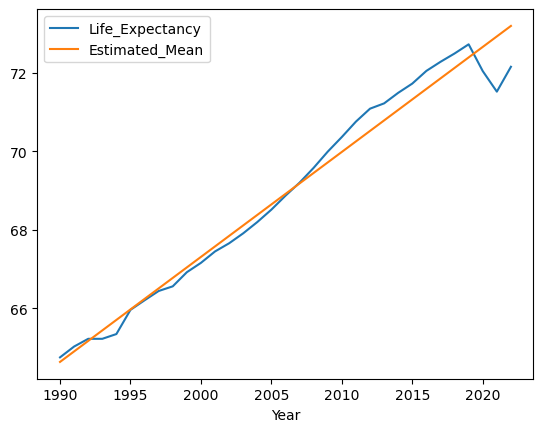

In [36]:
fig, ax = plt.subplots()
yearly_values.plot(x='Year', y='Life_Expectancy', ax=ax)
yearly_values.plot(x='Year', y='Estimated_Mean', ax=ax)

d. Plot the actual values against your model's estimates for the mean life expectancy.

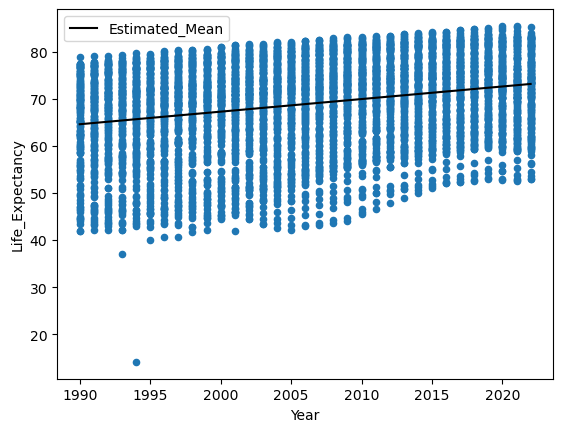

In [38]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
yearly_values.plot(kind="line", x="Year", y="Estimated_Mean", color="black", ax=ax);

e. Inspect the R-squared value for the model. does it make sense, given the plot?  


In [41]:
lr_life_expectancy.rsquared

0.07154748843194647

In [43]:
lr_life_expectancy.resid.var()

82.39711252241106

In [45]:
gdp_le['Life_Expectancy'].var()

88.74671724809252

The rsquared value is pretty low because the model is estimating the average life expectancy, but there is still a lot of variability from year to year of the life expectancy between countries because there are other factors besides year that affects life expectancy.

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [49]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [51]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [53]:
lr_le_2021 = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

a. What coefficients do you get? Interpret the meaning of those coefficients.

In [56]:
lr_le_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

Based on the data above, the gdp per capita coefficient shows that for every one unit increase in the gdp per capita, there is a 0.000257 increase in the life expectancy of a nation. The y-intercept coefficient states that when the gdp per capita is 0, the average life expectancy is close to 66. Visually we can see the effect of gdp per capita on life expectancy using the predict method:

In [66]:
pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)

pred_df['mean_estimate'] = lr_le_2021.predict(pred_df)

pred_df.head(2)

,GDP_Per_Capita,mean_estimate
0,714.066712,66.133308
1,3060.381549,66.736057


Verify the first estimate

In [69]:
GDP_Per_Capita = 714.066712
estimate = lr_le_2021.params['Intercept'] + lr_le_2021.params['GDP_Per_Capita']*GDP_Per_Capita
estimate

66.13330768334158

Plot estimates with original dataset:

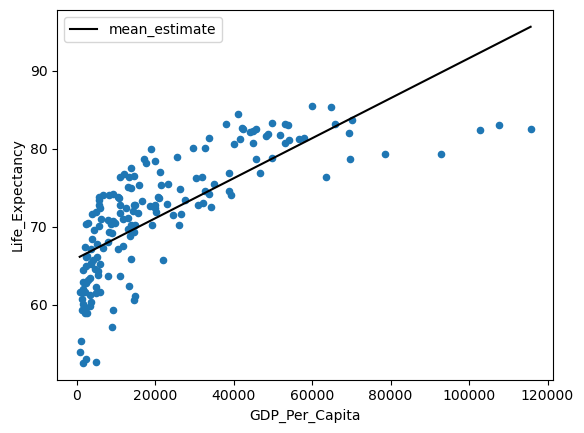

In [72]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="GDP_Per_Capita", y="mean_estimate", color="black", ax=ax);

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [75]:
gdp_le_2021['GDP_Per_Capita_1000'] = gdp_le_2021['GDP_Per_Capita']/1000

C:\Users\solid\AppData\Local\Temp\ipykernel_27896\4089976832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['GDP_Per_Capita_1000'] = gdp_le_2021['GDP_Per_Capita']/1000


In [77]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,GDP_Per_Capita_1000
0,Afghanistan,2021,1517.016266,Asia,61.982,1.517016
21,Albania,2021,14595.944386,Europe,76.463,14.595944
54,Algeria,2021,11029.138782,Africa,76.377,11.029139
87,Angola,2021,5911.835657,Africa,61.643,5.911836
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,19.899882
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,7.800502
5377,Vanuatu,2021,2800.493866,Oceania,70.449,2.800494
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,5.641044
5439,Zambia,2021,3236.788981,Africa,61.223,3.236789


In [79]:
lr_le_2021 = smf.ols("Life_Expectancy ~ GDP_Per_Capita_1000", data=gdp_le_2021).fit()

In [81]:
lr_le_2021.params

Intercept              65.949870
GDP_Per_Capita_1000     0.256892
dtype: float64

By using thousands of dollars of gdp per capita as the predictor instead, the coefficient of the GDP_Per_Capita was multiplied by 1000.

c. Are the coefficients statistically significant?

In [85]:
lr_le_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        13:22:13   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita_1000     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the data above, both of the confidence intervals of the Intercept coefficient and of GDP_Per_Capita_1000 neither contain 0, and the p values of both Intercept and GDP_Per_Capita_1000 is pretty close to 0, therefore both the coefficients of the Intercept and GDP_Per_Capita_1000 seem statistically significant. However, do the residuals follow a normal distribution and is the variability of these residuals constant?

Check if the residuals follow a normal distribution:

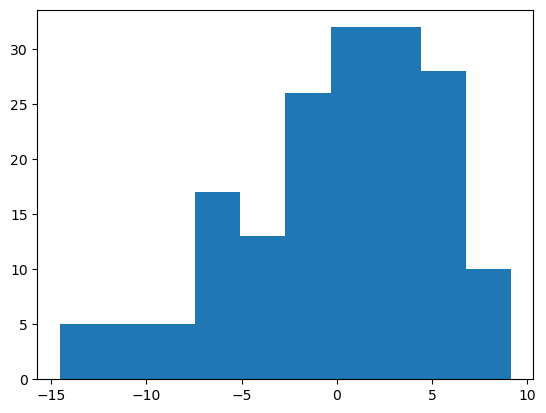

In [89]:
plt.hist(lr_le_2021.resid);

In [95]:
sms.jarque_bera(lr_le_2021.resid)

(12.724842533019249,
 0.0017251845192994518,
 -0.663772598543498,
 2.9459646075602683)

In [97]:
from scipy.stats import probplot

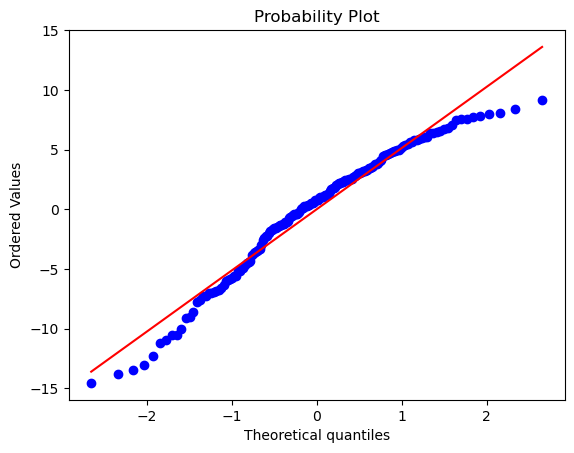

In [99]:
probplot(lr_le_2021.resid, plot=plt);

In [101]:
sms.het_breuschpagan(lr_le_2021.resid, lr_le_2021.model.exog)

(1.0321627180645492,
 0.3096512481674583,
 1.0263536925202543,
 0.31244794073203624)

According to the data and tests above, it does not seem that the residuals do not follow a normal distribution  but according to the Breusch-Pagan test above, the residuals do have a constant variance.

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000? What about one whose gdp per capita is 100,000?


In [108]:
GDP_Per_Capita = 50000
estimate = lr_le_2021.params['Intercept'] + lr_le_2021.params['GDP_Per_Capita_1000']*GDP_Per_Capita/1000
estimate

78.79445724641322

In [110]:
GDP_Per_Capita = 100000
estimate = lr_le_2021.params['Intercept'] + lr_le_2021.params['GDP_Per_Capita_1000']*GDP_Per_Capita/1000
estimate

91.63904465544813

 e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?


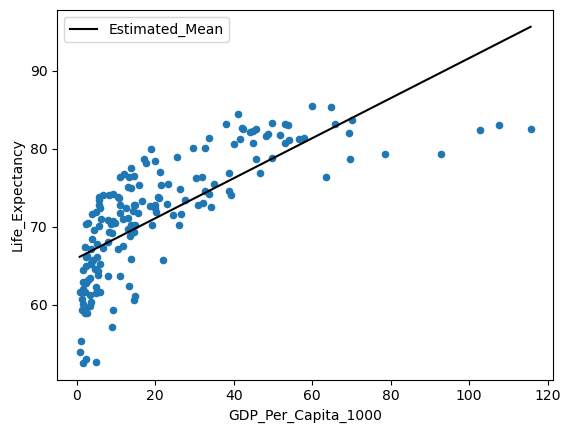

In [115]:
est_df = pd.DataFrame(
    {
        'GDP_Per_Capita_1000': np.linspace(start=gdp_le_2021['GDP_Per_Capita_1000'].min(), stop=gdp_le_2021['GDP_Per_Capita_1000'].max())
    }
)

est_df['Estimated_Mean'] = lr_le_2021.predict(est_df)

fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita_1000", y="Life_Expectancy", ax=ax)
est_df.plot(kind="line", x="GDP_Per_Capita_1000", y="Estimated_Mean", color="black", ax=ax);

The linear regression model captures the upward trend but does not fit the data since the data does not follow a linear trend.

3. Now, fit a model for life expectancy based on the log of gdp per capita.

In [121]:
lr_le_log_2021 = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)", data=gdp_le_2021).fit()

a. Inspect the coefficients for this model. Are they statistically significant?


In [124]:
lr_le_log_2021.params

Intercept                 18.946970
np.log(GDP_Per_Capita)     5.589014
dtype: float64

In [126]:
lr_le_log_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        14:42:54   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18.9470      2.547      7.438      0.000      13.919      23.975
np.log(GDP_Per_Capita)     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the data above, both of the confidence intervals of the Intercept coefficient and of the log of GDP_Per_Capita neither contain 0, and the p values of both Intercept and the log of GDP_Per_Capita is pretty close to 0, therefore both the coefficients of the Intercept and the log of GDP_Per_Capita seem statistically significant. However, do the residuals follow a normal distribution and is the variability of these residuals constant?

Check if the residuals follow a normal distribution:

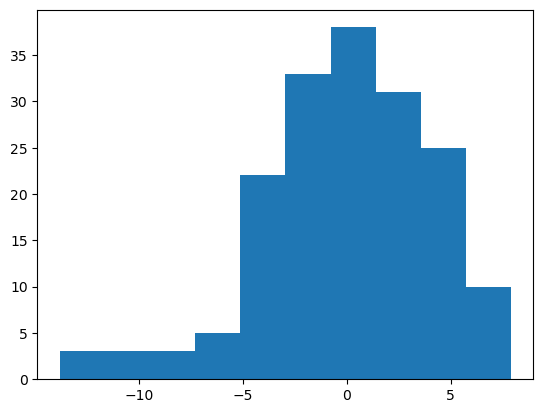

In [130]:
plt.hist(lr_le_log_2021.resid);

In [132]:
sms.jarque_bera(lr_le_log_2021.resid)

(18.921818757307857,
 7.783577662769136e-05,
 -0.724533395659447,
 3.724705203405056)

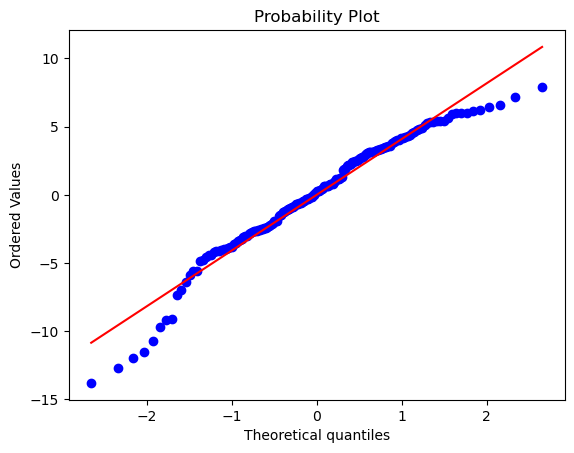

In [134]:
probplot(lr_le_log_2021.resid, plot=plt);

In [136]:
sms.het_breuschpagan(lr_le_log_2021.resid, lr_le_log_2021.model.exog)

(2.456583536135878,
 0.11703308952220823,
 2.463160369302461,
 0.11839264443085522)

Use the bootstrap method:

In [145]:
bootstrap_coef = []
num_resamples = 1000

for _ in range(num_resamples):
    boot_df = gdp_le.sample(n=len(gdp_le_2021), replace=True).copy()
    lr_boot = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)", data=boot_df).fit()
    bootstrap_coef.append(lr_boot.params['np.log(GDP_Per_Capita)'])

In [146]:
np.quantile(bootstrap_coef, q = [0.025, 0.975])

array([5.91127042, 7.17983357])

b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000? What about for those with a gdp per capita of 100,000?


In [151]:
lr_le_log_2021.params

Intercept                 18.946970
np.log(GDP_Per_Capita)     5.589014
dtype: float64

The log of gdp per capita coefficient shows that for every 1 unit increase in the log of gdp per capita, there is approximately a 5.59 increase in the average life expectancy. When using log of the predictor variable, its more about the percentage increase in the target variable, for instance a 1% increase in the predictor corresponds to about a coefficient/100 increase in the estimate.

In [154]:
GDP_Per_Capita = 50000
estimate = lr_le_log_2021.params['Intercept'] + lr_le_log_2021.params['np.log(GDP_Per_Capita)']*np.log(GDP_Per_Capita)
estimate

79.41886072606523

In [156]:
GDP_Per_Capita = 100000
estimate = lr_le_log_2021.params['Intercept'] + lr_le_log_2021.params['np.log(GDP_Per_Capita)']*np.log(GDP_Per_Capita)
estimate

83.29286991695193

c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?


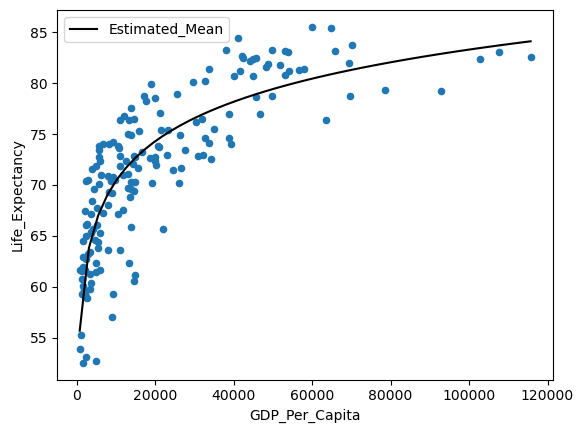

In [159]:
est_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)

est_df['Estimated_Mean'] = lr_le_log_2021.predict(est_df)

fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
est_df.plot(kind="line", x="GDP_Per_Capita", y="Estimated_Mean", color="black", ax=ax);

The log model above fits the data a whole lot better than the non logged model.

4. Finally, return to the full dataset. 
    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.


In [163]:
lr_le_log_gdp = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)", data=gdp_le).fit()

In [165]:
lr_le_log_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:30:04   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.1941      0.532     17.297      0.000       8.152      10.236
np.log(GDP_Per_Capita)     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?


In [168]:
lr_le_log_gdp_year = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita) + I(Year - 1990)", data=gdp_le).fit()

In [170]:
lr_le_log_gdp_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:36:13   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.5612      0.517     16.563      0.000       7.548       9.574
np.log(GDP_Per_Capita)     6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)             0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
lr_le_log_gdp_year.params

Intercept                 8.561151
np.log(GDP_Per_Capita)    6.359936
I(Year - 1990)            0.134487
dtype: float64

Accounting for the log of gdp per capita, for every 1 year increase there is a 0.134487 increase in the average life expectancy. A potential limitation and weakness of this model is that the samples may not be independent of each other.